In [8]:
# Import Necessary Libraries like pandas,numpy,sklearn(scikit-learn) for deep learning import keras etc.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load Iris dataset
iris =pd.read_csv('IRIS.csv')
X=iris[['sepal_length','sepal_width','petal_length','petal_width']]
y=iris['species']

# Visualizing Dataset with various Features

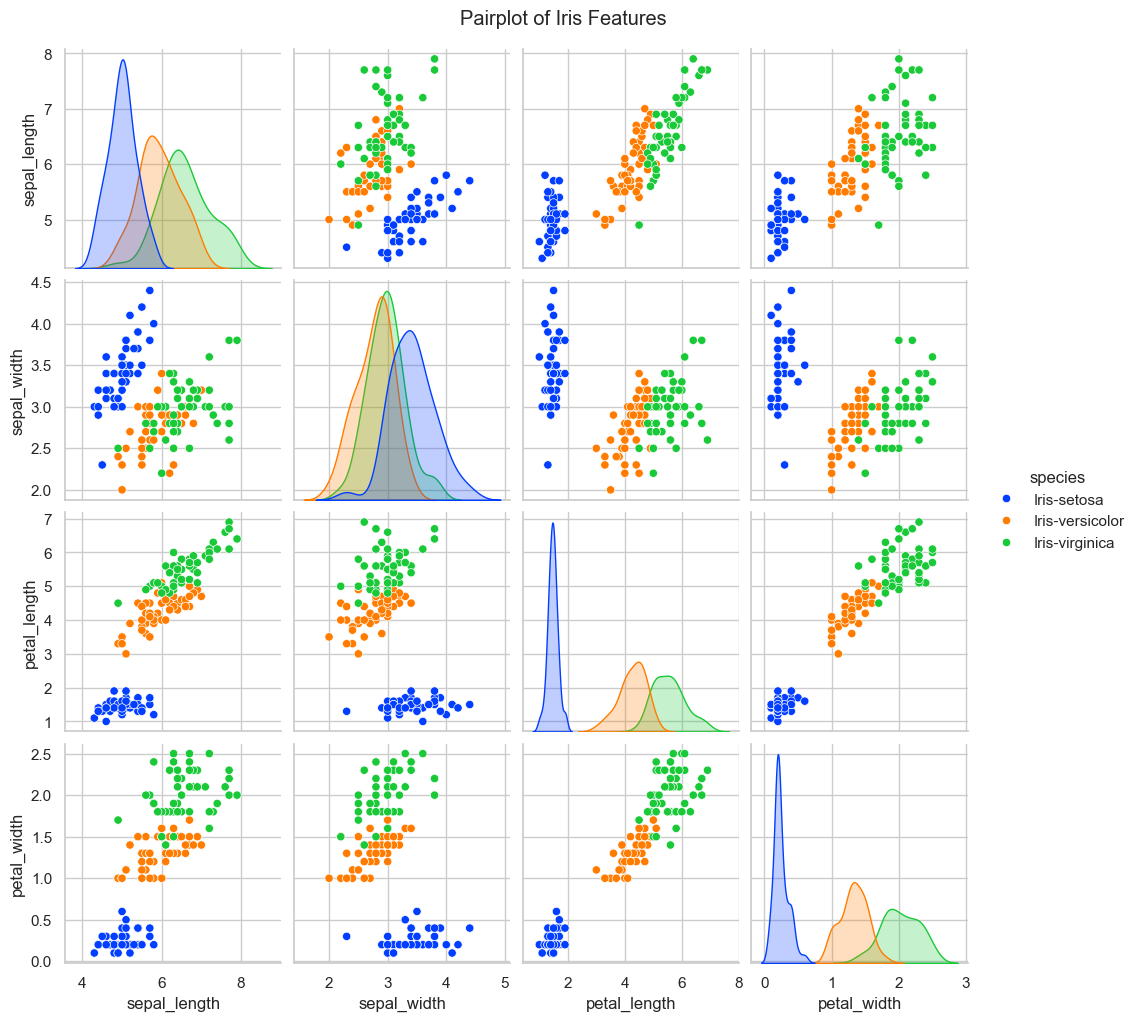

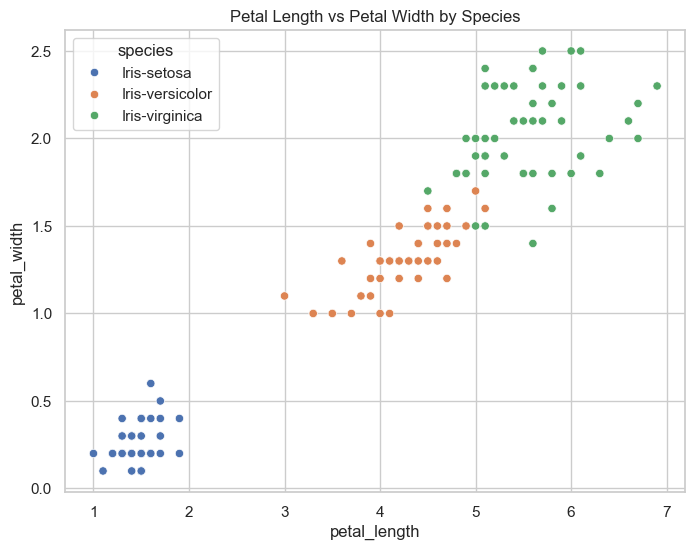

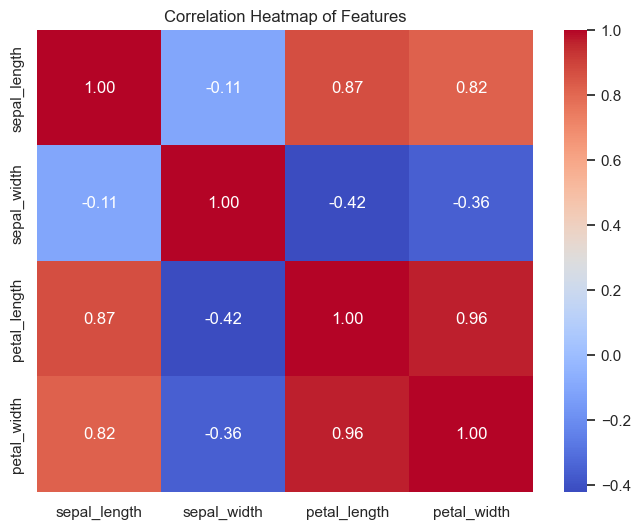

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# 🌼 Pairplot: all feature combinations colored by species
sns.pairplot(iris, hue='species', palette='bright')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

# 🌼 Scatter Plot: Petal Length vs Petal Width
plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species', palette='deep')
plt.title('Petal Length vs Petal Width by Species')
plt.grid(True)
plt.show()

# 🌼 Correlation Heatmap
plt.figure(figsize=(8, 6))
corr = iris.drop(columns='species').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Features")
plt.show()

# Deep Learning Model

In [9]:
# One-hot encode the labels
encoder = LabelBinarizer()
y_encoded = encoder.fit_transform(y)

In [10]:
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [11]:
# feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Define the neural network model
model = Sequential([
    Dense(10, input_shape=(4,), activation='relu'),  # Input layer with 4 features
    Dense(8, activation='relu'),                     # Hidden layer
    Dense(3, activation='softmax')                   # Output layer (3 classes)
])

In [26]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=5, verbose=1)

Epoch 1/10
24/24 [==============================] - 1s 2ms/step - loss: 0.0414 - accuracy: 0.9833
Epoch 2/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0405 - accuracy: 0.9833
Epoch 3/10
24/24 [==============================] - 0s 1ms/step - loss: 0.0416 - accuracy: 0.9833
Epoch 4/10
24/24 [==============================] - 0s 1ms/step - loss: 0.0396 - accuracy: 0.9833
Epoch 5/10
24/24 [==============================] - 0s 1ms/step - loss: 0.0391 - accuracy: 0.9833
Epoch 6/10
24/24 [==============================] - 0s 1ms/step - loss: 0.0398 - accuracy: 0.9833
Epoch 7/10
24/24 [==============================] - 0s 1ms/step - loss: 0.0408 - accuracy: 0.9833
Epoch 8/10
24/24 [==============================] - 0s 1ms/step - loss: 0.0425 - accuracy: 0.9750
Epoch 9/10
24/24 [==============================] - 0s 1ms/step - loss: 0.0419 - accuracy: 0.9833
Epoch 10/10
24/24 [==============================] - 0s 1ms/step - loss: 0.0413 - accuracy: 0.9833


In [28]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
#Accuracy on scale of one(closer to one more accurate model vice-versa)
print(f"Test Accuracy: {accuracy:.2f}")

1/1 [==============================] - 0s 34ms/step - loss: 0.0228 - accuracy: 1.0000


ValueError: Invalid format specifier

# Decision Tree

Accuracy: 1.00

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



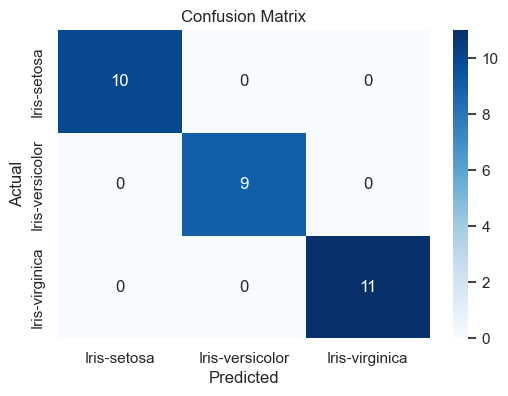

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
iris = pd.read_csv('IRIS.csv')

# Features and target
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['species']

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train Decision Tree
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
